<a href="https://colab.research.google.com/github/johnneme-alnemeh/Telco-Customer-Churn/blob/main/Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv');
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df = df.drop('customerID',axis = 1)
df = df.drop('PaymentMethod',axis = 1)
df = df.drop('PaperlessBilling',axis = 1)
df = df.drop('Contract',axis = 1)
df = df.drop('tenure',axis = 1)
df = df.drop('MonthlyCharges',axis = 1)
df = df.drop('TotalCharges',axis = 1)
df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,Female,0,Yes,No,No,No,DSL,No,Yes,No,No,No,No,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Yes
3,Male,0,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,No
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,No
7040,Female,0,Yes,Yes,No,No,DSL,Yes,No,No,No,No,No,No
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Yes


In [ ]:
X = df.loc[:,df.columns != 'Churn']
y = df['Churn']
n_cols = X.shape[1]

In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
l.fit(X[['gender']])
df['gender'] = l.transform(df[['gender']])


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
l.fit(X[['Partner']])
df['Partner'] = l.transform(df[['Partner']])


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
l.fit(X[['Dependents']])
df['Dependents'] = l.transform(df[['Dependents']])


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
l.fit(X[['PhoneService']])
df['PhoneService'] = l.transform(df[['PhoneService']])


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
l.fit(X[['MultipleLines']])
df['MultipleLines'] = l.transform(df[['MultipleLines']])


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
l.fit(X[['OnlineSecurity']])
df['OnlineSecurity'] = l.transform(df[['OnlineSecurity']])


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
l.fit(X[['OnlineBackup']])
df['OnlineBackup'] = l.transform(df[['OnlineBackup']])


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
l.fit(X[['DeviceProtection']])
df['DeviceProtection'] = l.transform(df[['DeviceProtection']])


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
l.fit(X[['TechSupport']])
df['TechSupport'] = l.transform(df[['TechSupport']])


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
l.fit(X[['StreamingTV']])
df['StreamingTV'] = l.transform(df[['StreamingTV']])

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
l.fit(X[['StreamingMovies']])
df['StreamingMovies'] = l.transform(df[['StreamingMovies']])
df

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,0,0,1,0,0,0,DSL,0,1,0,0,0,0,No
1,1,0,0,0,1,0,DSL,1,0,1,0,0,0,No
2,1,0,0,0,1,0,DSL,1,1,0,0,0,0,Yes
3,1,0,0,0,0,0,DSL,1,0,1,1,0,0,No
4,0,0,0,0,1,0,Fiber optic,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,DSL,1,0,1,1,1,1,No
7039,0,0,1,1,1,1,Fiber optic,0,1,1,0,1,1,No
7040,0,0,1,1,0,0,DSL,1,0,0,0,0,0,No
7041,1,1,1,0,1,1,Fiber optic,0,0,0,0,0,0,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
l.fit(y)
df['Churn'] = l.transform(df[['Churn']])
df

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,0,0,1,0,0,0,DSL,0,1,0,0,0,0,0
1,1,0,0,0,1,0,DSL,1,0,1,0,0,0,0
2,1,0,0,0,1,0,DSL,1,1,0,0,0,0,1
3,1,0,0,0,0,0,DSL,1,0,1,1,0,0,0
4,0,0,0,0,1,0,Fiber optic,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,DSL,1,0,1,1,1,1,0
7039,0,0,1,1,1,1,Fiber optic,0,1,1,0,1,1,0
7040,0,0,1,1,0,0,DSL,1,0,0,0,0,0,0
7041,1,1,1,0,1,1,Fiber optic,0,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()

In [ ]:
res = one.fit_transform(df[['InternetService']])
df = pd.get_dummies(df, columns=['InternetService'])
df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0
2,1,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,1,0,1,1,1,1,0,1,0,0
7039,0,0,1,1,1,1,0,1,1,0,1,1,0,0,1,0
7040,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
7041,1,1,1,0,1,1,0,0,0,0,0,0,1,0,1,0


In [ ]:
X = df.loc[:,df.columns != 'Churn']
y = df['Churn']
n_cols = X.shape[1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
model = Sequential()
model.add(Dense(120, activation='relu',input_shape=(n_cols,)))
model.add(Dense(90, activation='relu'))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
X.isnull().sum()

gender                         0
SeniorCitizen                  0
Partner                        0
Dependents                     0
PhoneService                   0
MultipleLines                  0
OnlineSecurity                 0
OnlineBackup                   0
DeviceProtection               0
TechSupport                    0
StreamingTV                    0
StreamingMovies                0
InternetService_DSL            0
InternetService_Fiber optic    0
InternetService_No             0
dtype: int64

In [ ]:
history = model.fit(X_train, y_train, epochs=80, batch_size=15)

Epoch 1/80
376/376 [==============================] - 2s 2ms/step - loss: 0.5906 - accuracy: 0.7373
Epoch 2/80
376/376 [==============================] - 1s 2ms/step - loss: 0.5896 - accuracy: 0.7512
Epoch 3/80
376/376 [==============================] - 1s 2ms/step - loss: 0.6527 - accuracy: 0.7586
Epoch 4/80
376/376 [==============================] - 1s 2ms/step - loss: 0.5840 - accuracy: 0.7561
Epoch 5/80
376/376 [==============================] - 1s 2ms/step - loss: 0.5285 - accuracy: 0.7533
Epoch 6/80
376/376 [==============================] - 1s 2ms/step - loss: 0.5633 - accuracy: 0.7480
Epoch 7/80
376/376 [==============================] - 1s 2ms/step - loss: 0.5262 - accuracy: 0.7710
Epoch 8/80
376/376 [==============================] - 1s 2ms/step - loss: 0.5016 - accuracy: 0.7721
Epoch 9/80
376/376 [==============================] - 1s 2ms/step - loss: 0.5016 - accuracy: 0.7657
Epoch 10/80
376/376 [==============================] - 1s 2ms/step - loss: 0.4855 - accuracy: 0.7739

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 120)               1920      
                                                                 
 dense_40 (Dense)            (None, 90)                10890     
                                                                 
 dense_41 (Dense)            (None, 1)                 91        
                                                                 
Total params: 12,901
Trainable params: 12,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

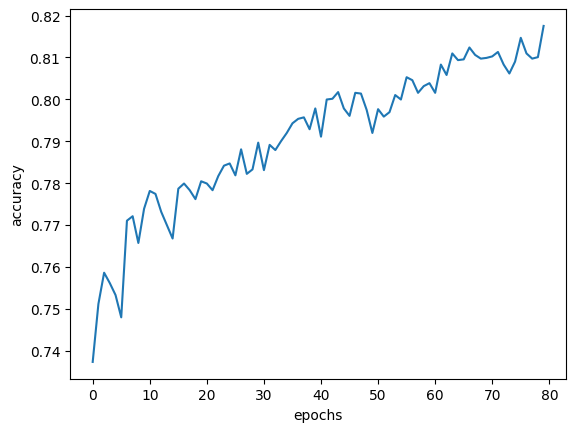

In [ ]:
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.show()

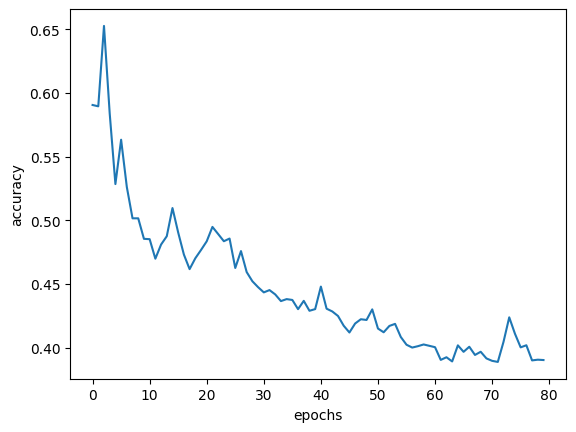

In [ ]:
plt.plot(history.history['loss'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.show()

In [ ]:
_ , acc = model.evaluate(X_test, y_test)

45/45 [==============================] - 0s 1ms/step - loss: 1.0547 - accuracy: 0.7381


In [ ]:
acc

0.7381121516227722

In [ ]:
model.predict(X_test)

45/45 [==============================] - 0s 988us/step


array([[-0.1337909 ],
       [ 0.02179928],
       [ 0.26066697],
       ...,
       [-0.06381249],
       [ 0.11714289],
       [ 0.606991  ]], dtype=float32)

In [ ]:
model.save('model.h5')

In [ ]:
model.predict(X_test)

45/45 [==============================] - 0s 948us/step


array([[-0.1337909 ],
       [ 0.02179928],
       [ 0.26066697],
       ...,
       [-0.06381249],
       [ 0.11714289],
       [ 0.606991  ]], dtype=float32)